In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd
plt.style.use('ggplot')

In [70]:
df = pd.read_csv('cleaned.csv')
df.head(10)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65.0,34.0,52.7,2.2,38.5,33.5,33.0,5.0,Rural,1337.0
1,Beijing,2020-01-02,137.0,33.7,31.5,36.7,27.5,-1.6,32.0,4.0,Urban,1545.0
2,London,2020-01-03,266.0,43.0,59.6,30.4,57.3,36.4,25.0,10.0,Suburban,1539.0
3,Mexico City,2020-01-04,293.0,33.7,37.9,12.3,42.7,-1.0,67.0,10.0,Urban,552.0
4,Delhi,2020-01-05,493.0,50.3,34.8,31.2,35.6,33.5,72.0,9.0,Suburban,1631.0
5,Cairo,2020-01-06,28.0,67.2,44.9,41.9,47.8,7.9,89.0,11.0,Urban,1291.0
6,Los Angeles,2020-01-07,217.0,29.0,63.7,22.3,56.0,27.7,22.0,8.0,Urban,1852.0
7,Los Angeles,2020-01-08,449.0,60.8,56.2,40.0,18.1,26.3,46.0,14.0,Urban,350.0
8,Delhi,2020-01-09,342.0,44.9,63.4,31.0,34.9,28.0,34.0,7.0,Urban,878.0
9,Beijing,2020-01-10,279.0,27.1,101.0,47.8,42.2,-2.1,24.0,8.0,Urban,179.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 1797 non-null   object 
 1   date                 1797 non-null   object 
 2   aqi                  1797 non-null   float64
 3   pm2_5                1797 non-null   float64
 4   pm10                 1797 non-null   float64
 5   no2                  1797 non-null   float64
 6   o3                   1797 non-null   float64
 7   temperature          1797 non-null   float64
 8   humidity             1797 non-null   float64
 9   hospital_admissions  1797 non-null   float64
 10  population_density   1797 non-null   object 
 11  hospital_capacity    1797 non-null   float64
dtypes: float64(9), object(3)
memory usage: 168.6+ KB


In [72]:
df['date'] = pd.to_datetime(df['date'])
df['Month_name'] = df['date'].dt.month_name()
df['Day_name'] = df['date'].dt.day_name()
df.sort_values(by='date',ascending=True).head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,Month_name,Day_name
0,Los Angeles,2020-01-01,65.0,34.0,52.7,2.2,38.5,33.5,33.0,5.0,Rural,1337.0,January,Wednesday
1,Beijing,2020-01-02,137.0,33.7,31.5,36.7,27.5,-1.6,32.0,4.0,Urban,1545.0,January,Thursday
2,London,2020-01-03,266.0,43.0,59.6,30.4,57.3,36.4,25.0,10.0,Suburban,1539.0,January,Friday
3,Mexico City,2020-01-04,293.0,33.7,37.9,12.3,42.7,-1.0,67.0,10.0,Urban,552.0,January,Saturday
4,Delhi,2020-01-05,493.0,50.3,34.8,31.2,35.6,33.5,72.0,9.0,Suburban,1631.0,January,Sunday


In [73]:
df.sort_values(by='date',ascending=True).tail()


,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity,Month_name,Day_name
1792,Beijing,2024-12-27,187.0,29.9,37.4,36.6,56.8,6.4,30.0,7.0,Urban,367.0,December,Friday
1793,Mexico City,2024-12-28,440.0,46.5,46.5,33.1,20.8,16.6,76.0,8.0,Urban,1837.0,December,Saturday
1794,Los Angeles,2024-12-29,459.0,34.5,65.6,34.0,29.5,30.4,47.0,7.0,Suburban,1259.0,December,Sunday
1795,Delhi,2024-12-30,412.0,46.8,39.9,37.0,33.8,5.5,35.0,8.0,Urban,1247.0,December,Monday
1796,Beijing,2024-12-31,270.0,24.5,41.4,11.6,43.8,36.4,52.0,1.0,Suburban,875.0,December,Tuesday


In [74]:
df=df.sort_values(by='date',ascending=True).reset_index().drop('index',axis=1)

In [75]:
df.drop('date',axis=1).describe()

,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,249.705064,34.496049,50.939566,30.035448,39.644185,17.367557,56.134112,7.931553,1009.248191
std,144.684600,14.768865,19.969568,9.919755,11.963700,13.096555,21.288148,3.529432,556.249830
min,0.000000,0.200000,0.300000,0.800000,0.400000,-5.000000,20.000000,0.000000,50.000000
25%,123.000000,24.400000,37.400000,23.500000,31.900000,5.800000,37.000000,6.000000,551.000000
50%,253.000000,34.500000,50.900000,30.200000,39.700000,17.000000,57.000000,8.000000,982.000000
75%,372.000000,44.400000,64.500000,36.900000,47.400000,28.800000,74.000000,10.000000,1480.000000
max,499.000000,87.700000,120.600000,65.100000,87.800000,40.000000,94.000000,16.000000,1998.000000


<Axes: title={'center': 'Table de corrélation des 10 premières variables'}>

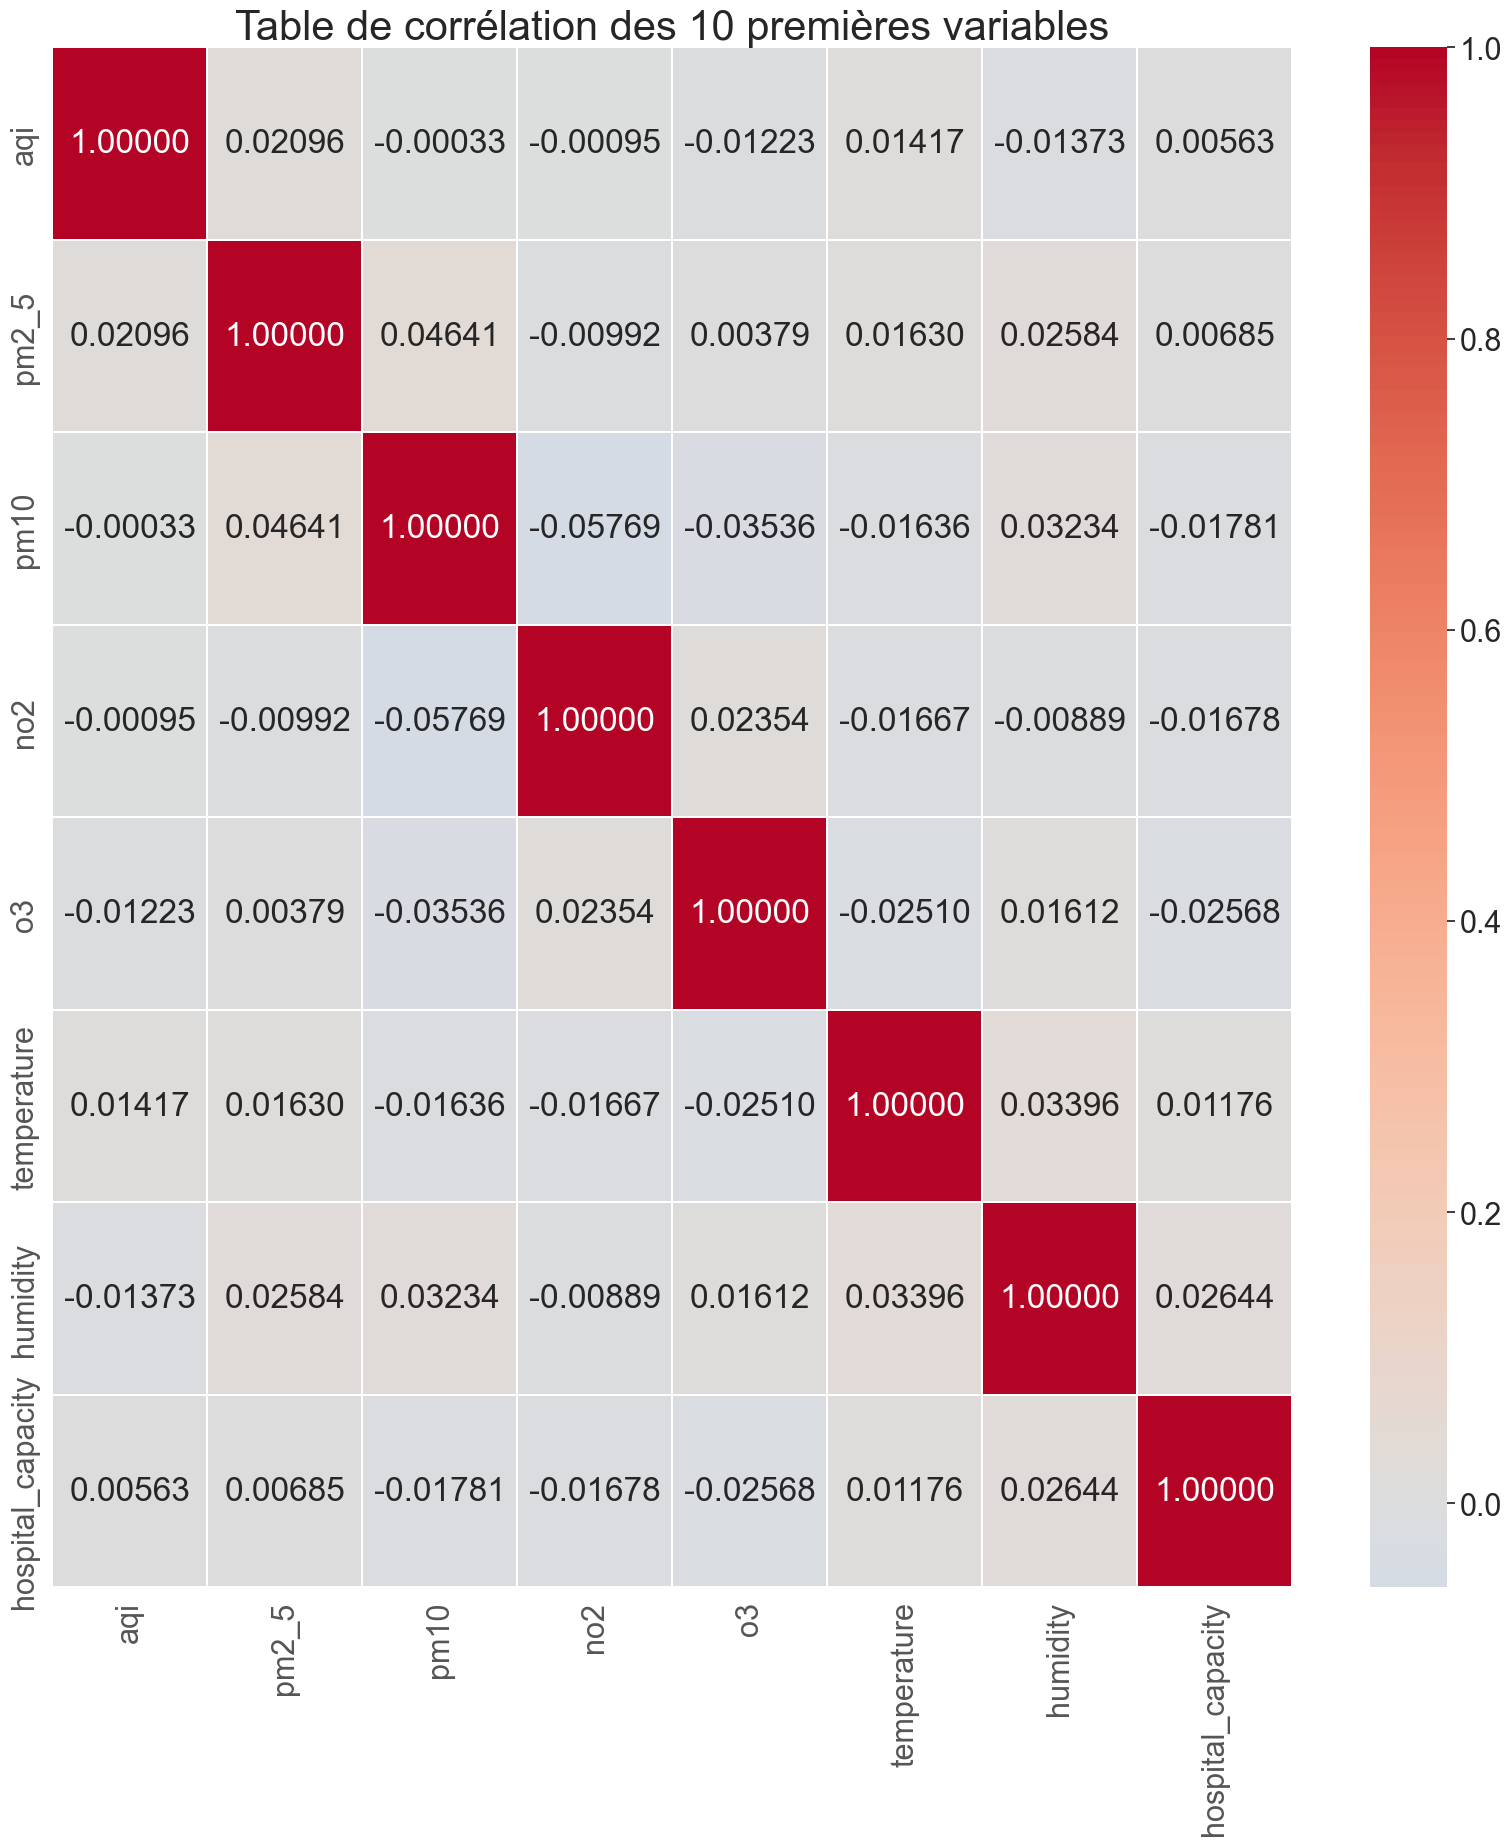

In [76]:
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation des 10 premières variables", fontsize=30)

df_corr = df[['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'hospital_capacity']]

table_corr = df_corr.corr()

sns.set_theme(style="darkgrid", font_scale=2)
plt.xlabel("",fontsize=10)
plt.ylabel("",fontsize=10)

sns.heatmap(table_corr, 
            cmap='coolwarm',
            center=0,             
            linewidths=0.3,
            annot=True,
            fmt=".5f"
)


In [77]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'
columns_to_analyze = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity']

fig = go.Figure()

# Add histograms
for column in columns_to_analyze:
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ))

# Update layout
fig.update_layout(
    title='Distribution of Pollutants and Meteorological Data',
    xaxis_title='Value',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
    template='plotly_white'
)

In [78]:
colors = [
    'rgb(31, 119, 180)',
    'rgb(255, 127, 14)',
    'rgb(44, 160, 44)',
    'rgb(214, 39, 40)',
    'rgb(148, 103, 189)',
    'rgb(140, 86, 75)',
    'rgb(227, 119, 194)',
    'rgb(127, 127, 127)',
    'rgb(188, 189, 34)']
fig = go.Figure()

# Add box plots with customized colors
for i, column in enumerate(columns_to_analyze):
    fig.add_trace(go.Box(
        y=df[column],
        name=column,
        boxmean=True,
        marker=dict(color=colors[i], line=dict(width=1)),
        fillcolor=colors[i],
        line_color='rgb(8,48,107)'
    ))

# Update layout with a more beautiful design
fig.update_layout(
    title='Box Plots of Pollutants and Meteorological Data',
    yaxis_title='Value',
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

In [79]:
import plotly.express as px
# Aggregate data for pie chart
pie_data = df['city'].value_counts().reset_index()
pie_data.columns = ['city', 'Count']
# Create subplots
fig = sp.make_subplots(rows=1, cols=1, specs=[[{'type':'pie'}]])
# Add pie charts to subplots
fig.add_trace(go.Pie(
    labels=pie_data['city'],
    values=pie_data['Count'],
    name='City Distribution',
    textinfo='label+percent',
    hole=0.3
))
# Update layout for pie charts
fig.update_layout(
    title_text='Distribution of Cities',
    template='plotly_white',
    height=600,
    width=600
)
fig.show()

In [80]:
import plotly.express as px

# Calculate correlation matrix
correlation_matrix = df[['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity']].corr()

# Create a heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',  # Different color scale
    title='Correlation Matrix Heatmap',
    labels={'color': 'Correlation Coefficient'}
)

# Update layout for heatmap with increased size
fig.update_layout(
    template='plotly_white',
    font=dict(size=15),
    title_font=dict(size=20, family='Arial'),
    plot_bgcolor='rgb(240,240,240)',
    paper_bgcolor='rgb(255,255,255)',
    margin=dict(l=80, r=80, t=80, b=80),
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=45),
    height=800,  # Increase height
    width=1000   # Increase width
)

fig.show()

    Year  Month     city      pm2_5       pm10        no2         o3  \
0   2020      1  Beijing  35.500000  54.300000  33.533333  37.933333   
7   2020      2  Beijing  21.525000  50.487500  27.400000  45.062500   
13  2020      3  Beijing  42.842857  62.957143  24.628571  41.257143   
18  2020      4  Beijing  30.412500  49.900000  30.100000  35.550000   
25  2020      5  Beijing  38.381818  59.727273  31.481818  40.127273   

    temperature   humidity         aqi  ...  hospital_capacity  pm2_5_Change  \
0      8.150000  50.166667  320.166667  ...        1189.500000      0.000000   
7     17.837500  52.125000  286.000000  ...        1136.125000    -13.975000   
13    21.385714  69.714286  229.571429  ...        1136.714286     21.317857   
18    24.637500  52.625000  196.250000  ...        1000.750000    -12.430357   
25    16.654545  56.000000  271.000000  ...         826.454545      7.969318   

    pm10_Change  no2_Change  o3_Change  temperature_Change  humidity_Change  \
0      

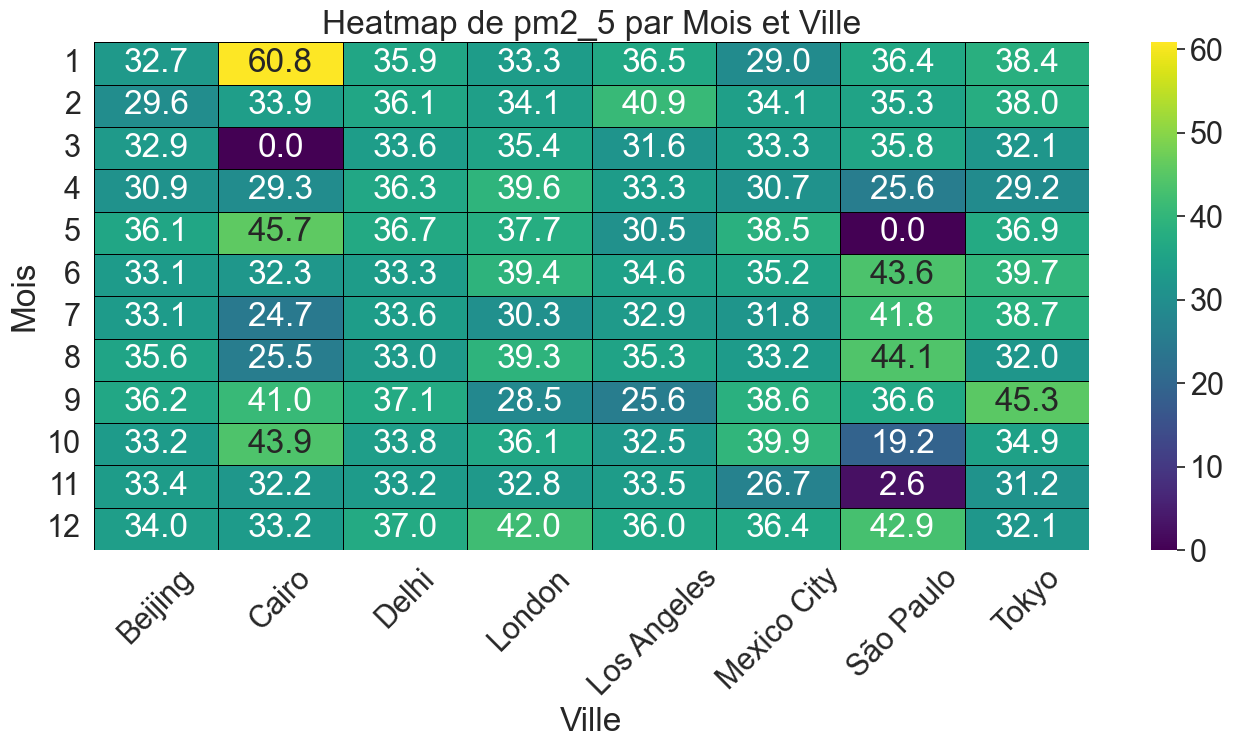

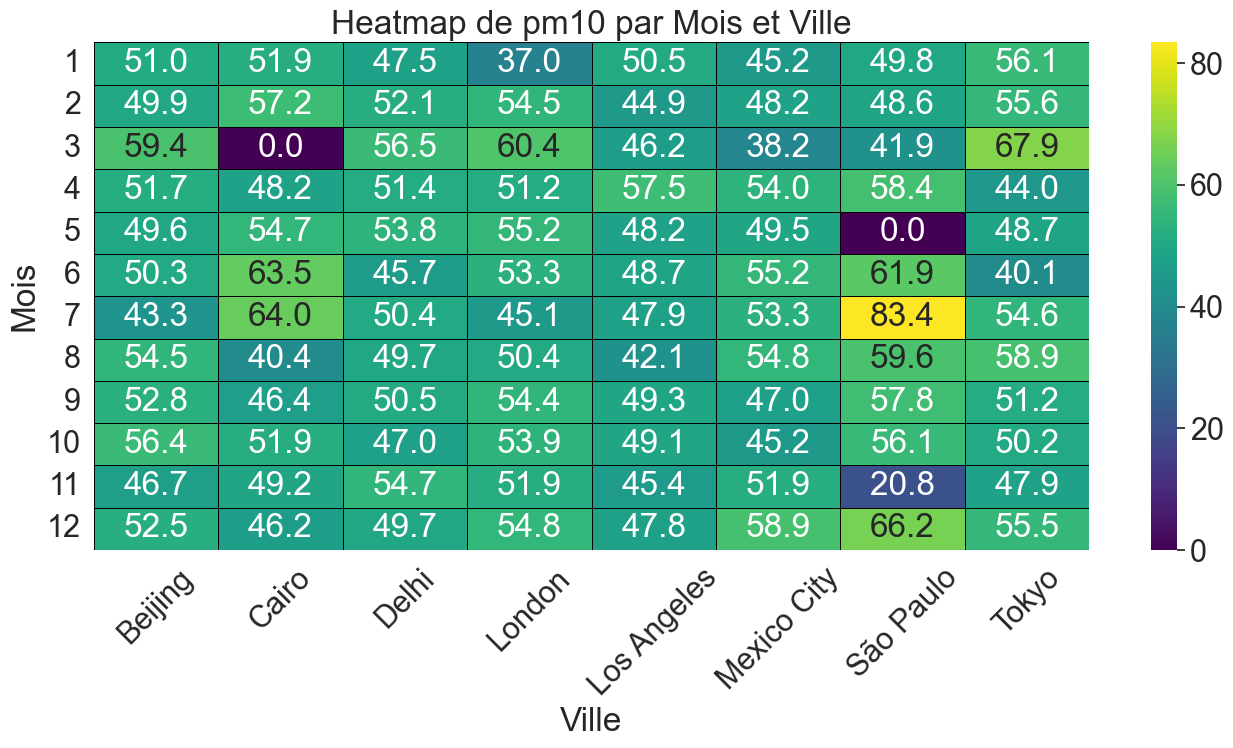

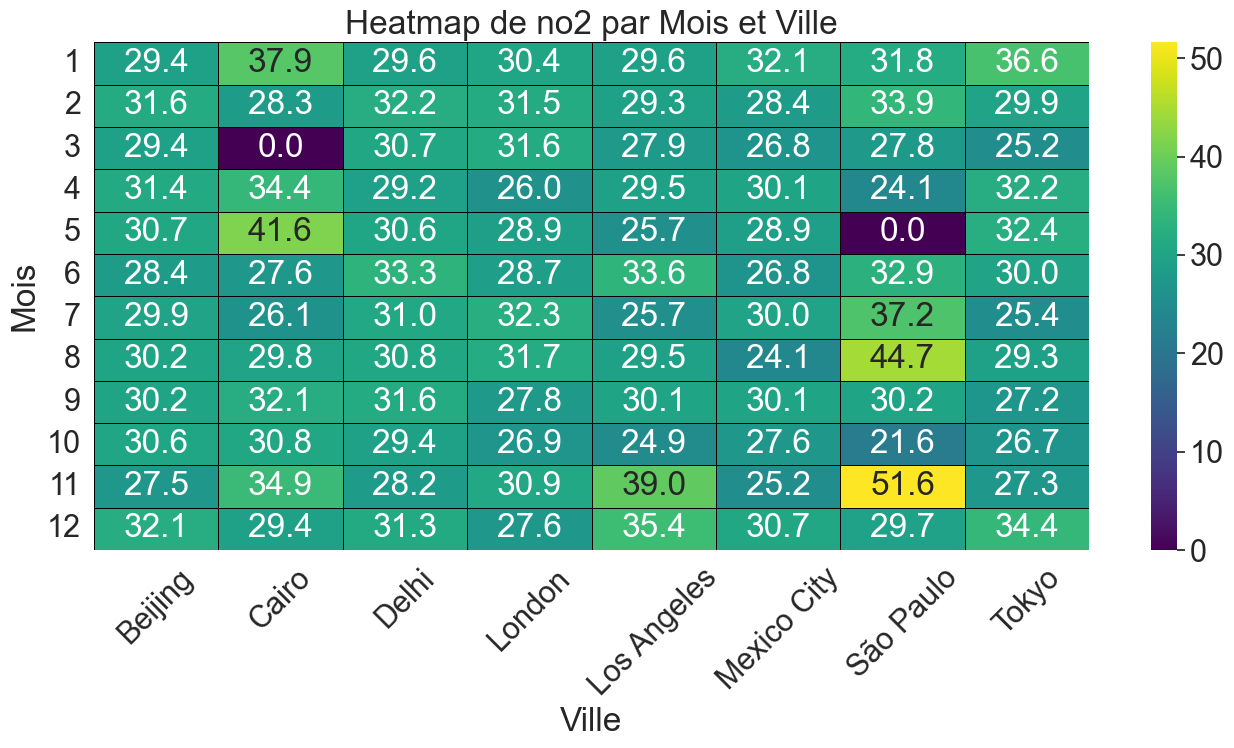

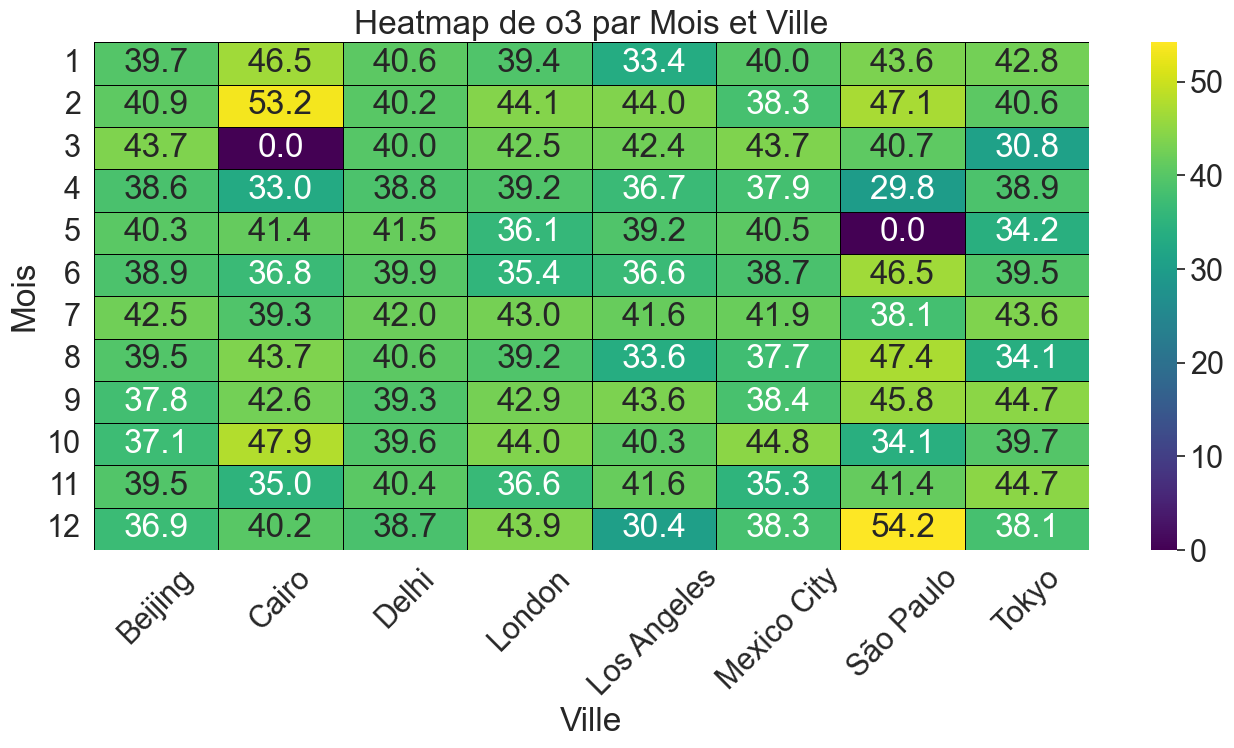

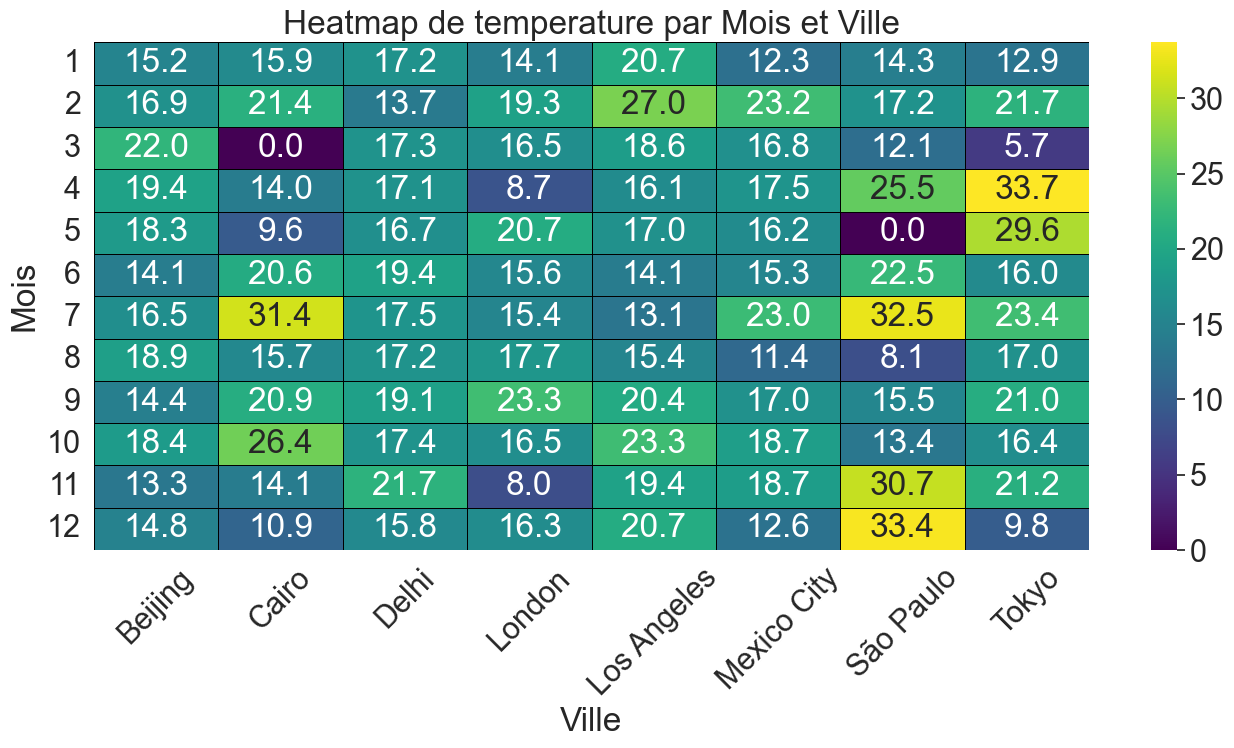

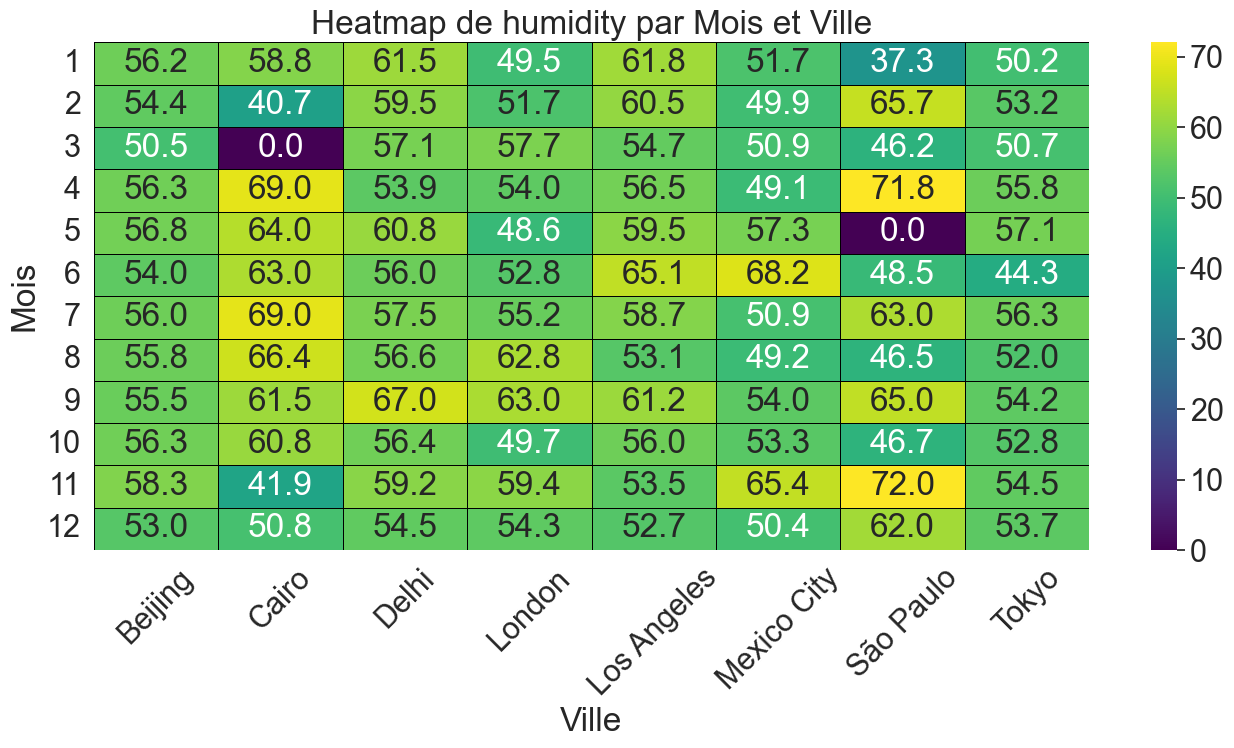

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convertir les dates
df['date'] = pd.to_datetime(df['date'])

# 2. Extraire année et mois
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# 3. Agréger par mois et ville
monthly_city_summary = df.groupby(['Year', 'Month', 'city']).agg({
    'pm2_5': 'mean',
    'pm10': 'mean',
    'no2': 'mean',
    'o3': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'aqi': 'mean',
    'hospital_admissions': 'mean',
    'hospital_capacity': 'mean'
}).reset_index()

# 4. Trier
monthly_city_summary.sort_values(by=['city', 'Year', 'Month'], inplace=True)

# 5. Calculer les variations mois par mois
change_columns = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity', 'aqi', 'hospital_admissions', 'hospital_capacity']
for col in change_columns:
    monthly_city_summary[f'{col}_Change'] = monthly_city_summary.groupby('city')[col].diff()

# 6. Remplacer les NaN des colonnes _Change par 0 (si logique pour l’analyse)
change_cols = [col for col in monthly_city_summary.columns if col.endswith('_Change')]
monthly_city_summary[change_cols] = monthly_city_summary[change_cols].fillna(0)

# 7. Affichage de la table finale (facultatif)
print(monthly_city_summary.head())




columns_to_analyze = ['pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity']

for column in columns_to_analyze:
    plt.figure(figsize=(14, 8))

    # Créer le tableau croisé
    heatmap_data = monthly_city_summary.pivot_table(
        index='Month',
        columns='city',
        values=column,
        aggfunc='mean'
    ).fillna(0)  # Remplit les valeurs manquantes par 0

    # Afficher la heatmap
    sns.heatmap(
        heatmap_data,
        cmap='viridis',  # ou 'coolwarm' pour les _Change
        linewidths=0.5,
        linecolor='black',
        annot=True,       # ✅ active les valeurs dans les cases
        fmt=".1f"         # Format des nombres (1 décimale ici)
    )


    plt.title(f'Heatmap de {column} par Mois et Ville')
    plt.xlabel('Ville')
    plt.ylabel('Mois')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
